<a href="https://colab.research.google.com/github/mohammedradman1/DSE_Term_Project/blob/main/DSE_Term_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining Data from Git Repository

### Obtain the data from the project repository in Github

In [1]:
# obtaining the data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# unzipping the file to cureent working directory
!unzip '/content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip' -d '/content'

Archive:  /content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip
  inflating: /content/TeePublic_review.csv  


### Import needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing matplot library for graph
import seaborn as sns  # importing searborns library
import nltk # importing Natural Language Toolkit library
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Read Data into pandas datafram

In [4]:
# Reading CSV file into pandas dataframe.
df = pd.read_csv("TeePublic_review.csv", encoding='latin-1') # reading the datafile
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


# Exploratory Data Analysis

In [5]:
# checking the shape of the data
print(df.shape)

(278100, 10)


In [6]:
# viewing a sample of the data
df.sample(5)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
36992,36992.0,US,37.09024,-95.712891,2022,12,2020 00:00:00,Nice shirt,I received a badass shirt at a cheap price. Sh...,5
115910,115910.0,US,37.09024,-95.712891,2022,2,2006 00:00:00,My shirt was too small but I am gettingï¿½ï¿½ï¿½,My shirt was too small but I am getting a larg...,5
206666,206666.0,US,37.09024,-95.712891,2020,5,2024 00:00:00,My son is quite pleased with his shirt,My son is quite pleased with his shirt. It's c...,5
176527,176527.0,US,37.09024,-95.712891,2020,12,2018 00:00:00,Printing needs improvements,"ok, the green and bluish shirts were good/okay...",3
233531,233531.0,US,37.09024,-95.712891,2019,11,2027 00:00:00,Great customer service.,My first order the tee shirts were a bit too s...,5


In [7]:
# viewing information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278100 non-null  object 
 2   latitude        278100 non-null  float64
 3   longitude       278100 non-null  float64
 4   date            278100 non-null  int64  
 5   month           278100 non-null  int64  
 6   year            278100 non-null  object 
 7   title           278091 non-null  object 
 8   review          247597 non-null  object 
 9   review-label    278100 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.2+ MB


In [8]:
# view statistical analysis of all numerical columns
df.describe()

,reviewer_id,latitude,longitude,date,month,review-label
count,278099.000000,278100.000000,278100.000000,278100.000000,278100.000000,278100.000000
mean,139049.000000,37.189516,-88.182471,2020.889518,7.195329,4.409730
std,80280.410593,10.217722,37.028084,1.390760,3.678214,1.178112
min,0.000000,-40.900557,-172.104629,2018.000000,1.000000,1.000000
25%,69524.500000,37.090240,-95.712891,2020.000000,4.000000,4.000000
50%,139049.000000,37.090240,-95.712891,2021.000000,7.000000,5.000000
75%,208573.500000,37.090240,-95.712891,2022.000000,11.000000,5.000000
max,278098.000000,64.963051,174.885971,2023.000000,12.000000,5.000000


In [9]:
# Display the statistical analysis of numerical columns for target class (mean, std, min, max, etc).
df['review-label'].describe()

count    278100.000000
mean          4.409730
std           1.178112
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review-label, dtype: float64

Text(0.5, 0, 'Reviews stars')

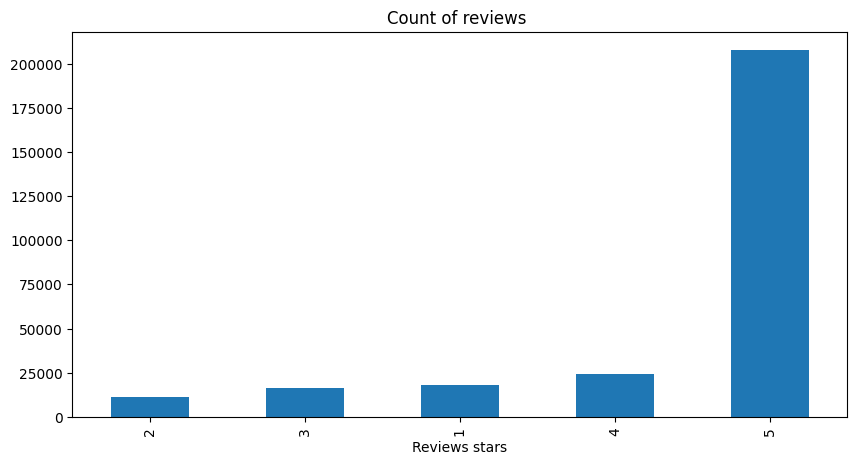

In [10]:
# plotting the count of the unique values within the review-label
reviews = df['review-label']
ax = reviews.value_counts().sort_values()\
      .plot( title = 'Count of reviews ',
            figsize = (10,5),
             kind = 'bar')
ax.set_xlabel('Reviews stars')

In [11]:
# checking for null values in columns
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [12]:
df['review-label'].value_counts()

5    207574
4     24501
1     18133
3     16555
2     11337
Name: review-label, dtype: int64

In [13]:
example = df['review'].values[2]
print(example)

These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options.


In [14]:
tokens=nltk.wordpunct_tokenize(example)
tokens[ :10]

['These',
 'guys',
 'offer',
 'the',
 'best',
 'customer',
 'service',
 'in',
 'all',
 'of']

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[ :10]

[('These', 'DT'),
 ('guys', 'NNS'),
 ('offer', 'VBP'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('of', 'IN')]

In [16]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...


(S
  These/DT
  guys/NNS
  offer/VBP
  the/DT
  best/JJS
  customer/NN
  service/NN
  in/IN
  all/DT
  of/IN
  retail/JJ
  !/.
  Their/PRP$
  products/NNS
  are/VBP
  off/RB
  high/JJ
  quality/NN
  and/CC
  there/EX
  '/''
  s/VBD
  a/DT
  fantastic/JJ
  selection/NN
  of/IN
  design/NN
  and/CC
  product/NN
  options/NNS
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


In [17]:
#sentiment analysis by vader
#1.stop words are removed
#2.each word is scored and combined to a total score

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
example

"These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options."

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.8439}



---



---



---



---



# Data Cleaning

## Filling with the mode per each category

In this method we as we have the rating value for each null review, <br> we can fill the review with the mode value of the rate category.

In [21]:
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [22]:
# finding the modes for each category
rate_cat_modes = df.groupby('review-label')['review'].apply(lambda x: x.mode()[0])
rate_cat_modes

review-label
1    First time customer with TeePublic...placed an...
2    Did not look like what was pictured. The graph...
3    As described, good delivery I would use them a...
4    4 stars: Great ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ dec...
5                                        Great service
Name: review, dtype: object

In [23]:
df[ df['review'].isnull() ].sample(4)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
110459,110459.0,US,37.09024,-95.712891,2022,3,2006 00:00:00,Great customer service,NaN,5
171949,171949.0,US,37.09024,-95.712891,2020,12,2026 00:00:00,One of my son's favorite gift this year!,NaN,5
93708,93708.0,US,37.09024,-95.712891,2022,5,2009 00:00:00,Quick to fix an issue!,NaN,5
233214,233214.0,US,37.09024,-95.712891,2019,11,2030 00:00:00,My son loves these a lot.,NaN,5


In [24]:
# define a function that fills each Nan review with the most common value
def fillna_rate(row):
   row['review'] = rate_cat_modes[row['review-label']]
   return row

In [25]:
df_filled_mode = df.apply(fillna_rate, axis=1)

In [26]:
df_filled_mode.isnull().sum()

reviewer_id       1
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             9
review            0
review-label      0
dtype: int64

## Filling values using KNN

### Related Columns Preprocessing

In [ ]:
# find null values
df.isnull().sum()

we fill the null values of the other column so we can use it in the analysis. <br>
We will fill them with the mode value since they are small.

*   Title has 9 null values
*   reviewer_id will not be filled as it is not used in the KNN as a feature





In [ ]:
# the mode value of the title
data = df
title_mode = data['title'].mode()[0]


We drop the unnecessary columns from the data:

*   Reviewer id: as it is a system generated value.
*   year: a duplicate of the date and consists of misleading data



In [ ]:
# droping the reviewer_id and year from data
# store it in data again so that the droped column data is stored back
data = data.drop(['reviewer_id','year'], axis = 1)
# verify the drop
data.shape

In [ ]:
# the title null value rows
data[ data['title'].isnull() ]

In [ ]:
# we fill the values of
data['title'].fillna( df['title'].mode()[0] , inplace = True)

In [ ]:
# verify that the title column value is not null anymores
data.isnull().sum()

In [ ]:
# learning the data types
data.info()

we encode the store_location into numerical values.

In [ ]:
# country encoding numbers
numerical_val = [x for x in range(1, 142)]
countries_name = data['store_location'].unique()

# replace the country with its label encoding.
data['store_location'].replace(countries_name, numerical_val, inplace = True)

data.head()

In [ ]:
data.shape

In [ ]:
data.info()

### Text Preprocessing

#### Importing Libraries and Cleaning data

We will import libraries for steming and stop words



In [ ]:
import re  # For regular expressions
import numpy as np
# import the natural language processing library
import nltk
nltk.download('punkt') # download the punkt words tokens
from nltk.tokenize import word_tokenize  #$ importing the word tokenizer
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer  #$ importing the word lemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords  # For stop words
from nltk.stem import PorterStemmer  # For stemming

In [ ]:
# function to clean the text columns
def clean_text(text):
    text = re.sub('<[^>]*>', '', text) #removing html tags
    text = re.sub('[^A-Za-z0-9\s]', '', text) # Remove punctuation and special characters
    text = re.sub('\s+', ' ', text) # Remove extra spaces
    text = text.lower()
    return text

In [ ]:
# we need cleaning on title and review
data['title'] = data['title'].apply(clean_text)

#### Tokenization & Normalization

In [ ]:
#converting the text to tokens and adding them into a new columns for the title
data['title_tokens'] = df['title'].apply(lambda text: word_tokenize(text) if isinstance(text, str) else [])

Word stemming and stop words removal, we return the words to their root and remove the stop words.

In [ ]:
# we import the stopwords of English
stop_words = set( stopwords.words('english'))

In [ ]:
# Normalizing and removal of stop words
stemmer = PorterStemmer()  # creating a stemmer

# stem and removal of stop words
def stemFun(tokens):
  stem_list = []
  for word in tokens:
    if word in stop_words:  # check if word is a stop word pass over it.
      pass
    else: # if word is not a stopword, stem it and store it in list.
      stem_list.append( stemmer.stem(word) )

  return  stem_list

data['title_tokens'] = data['title_tokens'].apply(stemFun)
# data['review_tokens'] = data['review_tokens'].apply(stemFun)

In [ ]:
data.head()

In [ ]:
# importing necessary libraries
from gensim.models import Word2Vec

# getting the processed titles and reviews
processed_text_title = data[ 'title_tokens' ]

# Train Word2Vec model on the processed reviews
w2v_title_model = Word2Vec(processed_text_title.values.tolist(), min_count=1, window=5, vector_size=100)

In [ ]:
# Function to create a document embedding by averaging word embeddings
def create_doc_embedding(doc):
    doc_embedding = 0
    words_count = 0
    for word in doc:
        if word in w2v_title_model.wv:
            doc_embedding += w2v_title_model.wv[word]
            words_count += 1
    if words_count != 0:
        doc_embedding = doc_embedding / words_count
    return doc_embedding

# Create document embeddings
def embed_doc (processed_text):
  doc_embeddings = []
  for text in processed_text.values:
      doc_embedding = create_doc_embedding(text)  # Using the previously defined function
      doc_embeddings.append(doc_embedding)

  return doc_embeddings

title_embeddings = embed_doc(processed_text_title)
# review_embeddings = embed_doc(processed_text_review, model_review )

In [ ]:
# creating a dataframe with 100 columns
title_temp_df = pd.DataFrame([[ 0 for x in range(0,100)] for z in range(0,1)  ],
                       columns = ["title_embed_"+ str(x) for x in range(1,101)] )

# temparary dataframe to fill for missing values below
temp_df1 = pd.DataFrame([[ 0 for x in range(0,100)] for z in range(0,1)  ],
                       columns = ["title_embed_"+ str(x) for x in range(1,101)] )

In [ ]:
title_temp_df.head()

In [ ]:
n= 1
# passing on the first n records
for i in range( len(title_embeddings)):
  title_embed_list = []

  if np.shape(title_embeddings[i]) == (100,):
   title_embed =  np.reshape( title_embeddings[i], (-1,100) ) # convert the shape to (1,100)

   title_embed_list =[[  x for x in title_embed [0] ]]  # convert to 2D list 1 row * 100 column

   # create a dataframe of the embedded title text
   embeding_df_temp = pd.DataFrame( title_embed_list ,
                          columns = title_temp_df.columns)
  else:
    embeding_df_temp = temp_df1

  title_temp_df = pd.concat([title_temp_df, embeding_df_temp]) # Add to temporary dataframe

  n +=1
  if n>10000:
    break


In [ ]:
# check the data
print(f"shape of title embedding dataframe: {title_temp_df.shape}")
# delete first line that was added only for temperay use
title_temp_df = title_temp_df.iloc[1:, :]
print(f"shape of title embedding dataframe after removal of 1st row: {title_temp_df.shape}")

### Adding Vectorized Text to data

In [50]:
data.shape

(278100, 9)

In [51]:
title_temp_df;
title_temp_df.shape

(10000, 100)

In [52]:
data.shape

(278100, 9)

In [53]:
# adding the embedding back to the data
data = data.merge(title_temp_df, how='left', right_index = True, left_index = True)

In [54]:
# viewing the addition of the new data columns
data.head()

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_91,title_embed_92,title_embed_93,title_embed_94,title_embed_95,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.144024,...,0.546474,0.226265,-0.001043,0.007564,0.219506,0.383346,0.633379,-0.351275,0.119977,-0.394915
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.277975,...,0.128174,0.775415,-0.749173,0.246904,0.641655,0.563463,1.056801,-0.415466,0.500505,-0.547021
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.316642,...,0.153445,0.367438,0.573337,0.375969,1.023616,0.203937,0.309682,-0.204559,-0.221388,-0.362347
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.043822,...,0.724371,-0.386599,0.247442,-0.314297,0.574140,-0.302040,0.321937,-0.780051,0.545628,-0.732065
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.023030,...,0.755496,-0.186172,-0.469723,-0.229561,0.337500,0.172929,0.251116,-0.210635,0.098746,-0.482753


### Numerical Preprocessing

In [55]:
# we perform scaling for the numerical columns and the target class
from sklearn.preprocessing import StandardScaler  # import standard scalar

# Extract numerical columns
numerical_cols = ["store_location", "latitude", "longitude", "date", "month"]
numerical_data = data[numerical_cols]

# Standardize numerical data which is often recommended for KNN
scaler = StandardScaler()
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data),
                                      columns = numerical_data.columns)

In [56]:
# adding scaled values to the data
data = data.join(numerical_data_scaled, rsuffix='_scaled');  # using semicolon to prevent printing result
data.head(5)

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.144024,...,0.383346,0.633379,-0.351275,0.119977,-0.394915,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.277975,...,0.563463,1.056801,-0.415466,0.500505,-0.547021,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.316642,...,0.203937,0.309682,-0.204559,-0.221388,-0.362347,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.043822,...,-0.302040,0.321937,-0.780051,0.545628,-0.732065,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.023030,...,0.172929,0.251116,-0.210635,0.098746,-0.482753,-0.133464,-0.009546,-0.199667,1.434708,-0.318703


### Splitting the data for **KNN**

The columns that will be used for analysis are:

*  `["title_embed_"+ str(x) for x in range(1,101)]`
*   Plus numerical scaled columns



In [57]:
# name of features for the embedded title
features_name = ["title_embed_"+ str(x) for x in range(1,101)]
for index, name in enumerate(numerical_data_scaled.columns):
  # skip the last index name which is the target variable
  if index != len(numerical_data_scaled.columns)-1:
    features_name.append(name + "_scaled") # add the name of the scaled feature.
  else:  # assigning the name for target variable
    target_name = name


In [82]:
data

,Unnamed: 0,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,...,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled
0,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.383346,0.633379,-0.351275,0.119977,-0.394915,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
1,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.563463,1.056801,-0.415466,0.500505,-0.547021,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
2,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.203937,0.309682,-0.204559,-0.221388,-0.362347,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
3,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,-0.302040,0.321937,-0.780051,0.545628,-0.732065,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
4,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.172929,0.251116,-0.210635,0.098746,-0.482753,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,-0.455456,-0.090297,0.034448,0.538758,-0.207406,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
9996,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.068730,0.086749,-0.148191,0.365730,0.288505,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
9997,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,-0.302040,0.321937,-0.780051,0.545628,-0.732065,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
9998,0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"['great', 'help', 'lost', 'order']",...,0.352408,0.069129,-0.352313,0.118369,-0.251992,-0.133464,-0.009546,-0.199667,1.434708,-0.318703


In [80]:
data.to_csv("data_KNN.csv")
# reading ready data
# data = pd.read_csv("data_KNN.csv")

In [81]:
data['review'].isnull().sum()

0

In [ ]:
data2 = data

In [ ]:
# temp until we convert entire data into the dataframe array
missing_review_data = data[ data.isnull().any(axis=1) ] # store the missing data separately
data = data.dropna() # remove null values as

In [73]:
data2['title_embed_1'].isnull().sum()

0

In [74]:
data['title_embed_1'].isnull().sum()

0

In [77]:
missing_review_data.shape

AttributeError: 'function' object has no attribute 'shape'

In [64]:
data['review'].isnull().sum()

0

In [63]:
print(f"data shape: {data.shape} ")
print(f"missing reviews data shape: {missing_review_data.shape}")

data shape: (10000, 114) 
missing reviews data shape: (30503, 114)


In [64]:
data

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.037150,...,0.391522,0.634187,-0.422079,0.225698,-0.067162,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.384588,...,0.347595,0.914932,-0.494232,0.479215,-0.388568,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.488505,...,0.193130,0.346259,-0.166887,-0.186420,-0.246468,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.422302,...,-0.411632,0.116647,-0.888758,0.912585,-0.459413,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.162895,...,0.185182,0.105389,-0.120488,0.463756,-0.161284,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.031488,...,-0.608782,-0.187484,0.126868,0.649345,0.141329,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.189940,...,-0.177374,0.065937,-0.128920,0.263576,0.471110,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",-0.422302,...,-0.411632,0.116647,-0.888758,0.912585,-0.459413,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
0,1,37.09024,-95.712891,2023,6,great help with lost order,I had an order that was lost in transit. When ...,5,"[great, help, lost, order]",0.145652,...,0.210193,0.223963,-0.360403,0.126311,-0.463845,-0.133464,-0.009546,-0.199667,1.434708,-0.318703


In [65]:
# obtain the features + the target variable
X, Y = data[features_name], data[target_name]

In [66]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [67]:
# Creating the model
from sklearn.neighbors import KNeighborsClassifier
# create an instance of the classifier
k_model = KNeighborsClassifier(n_neighbors = 3)


In [68]:
# Model training
k_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# Test model
predicted = k_model.predict( X_test)

In [70]:
# measuring accuracy
from sklearn.metrics import accuracy_score

accur = accuracy_score(Y_test, predicted)
print("KNN accuracy: ", accur)

KNN accuracy:  1.0


In [71]:
# Choose a target review
target_review_index = 10  # assume we wish to find it for this review
target_combined_data = data.iloc[target_review_index,:][features_name]

# Find the closest neighbors
distances, indices = k_model.kneighbors([target_combined_data])

# Print the closest reviews
for i in range(len(indices[0])):
    neighbor_index = indices[0][i]
    # print(f"Closest Review {i+1}:\n{data.iloc[neighbor_index]}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [72]:
missing_review_data

,store_location,latitude,longitude,date,month,title,review,review-label,title_tokens,title_embed_1,...,title_embed_96,title_embed_97,title_embed_98,title_embed_99,title_embed_100,store_location_scaled,latitude_scaled,longitude_scaled,date_scaled,month_scaled
121,1,37.090240,-95.712891,2023,6,awesome tshirt love it vintage,NaN,5,"[awesom, t-shirt, love, vintag, ï¿½ï¿½ï¿½ï¿½]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
128,1,37.090240,-95.712891,2023,6,nice tee quick delivery,NaN,5,"[nice, tee, quick, deliveri, -]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
130,1,37.090240,-95.712891,2023,6,big selections lots to choose from,NaN,5,"[big, select, lot, choos]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
142,1,37.090240,-95.712891,2023,6,great company,NaN,5,"[great, compani]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
146,2,56.130366,-106.346771,2023,6,great as always,NaN,5,"[great, alway, !]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,1.434708,-0.318703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278058,1,37.090240,-95.712891,2018,4,awsome quality quick delivery,NaN,5,"[awsom, qualiti, quick, deliveri]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,-2.086508,1.338558
278063,1,37.090240,-95.712891,2018,4,i was impressed,NaN,5,"[i, impress, !]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,-2.086508,1.338558
278064,2,56.130366,-106.346771,2018,4,i love my shirt,NaN,5,"[i, love, shirt, !]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,-2.086508,1.338558
278074,1,37.090240,-95.712891,2018,4,killer shirts,NaN,5,"[killer, shirt]",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.133464,-0.009546,-0.199667,-2.086508,1.338558


In [ ]:
# Now we fill the missing values using the KNN
missing_rows_indices = missing_review_data.index.values.tolist()
# missing_rows_indices = [3,3]

# we pass per each record and find its neighbors
for index in missing_rows_indices:
  target_combined_data = missing_review_data.iloc[index,:][features_name]
  # Find the closest neighbors
  print(target_combined_data)
  distances, indices = k_model.kneighbors([target_combined_data])
  # closest neighbor index
  neighbor_index = indices[0][0]

  # closed neighbor review
  review = data.iloc[neighbor_index, :]['review']

  # store the review in the missing data
  missing_review_data.iloc[index, :]['review'] = review


In [ ]:
# add the missing_review_data to the entire data
df_filled_knn = pd.concat(data, missing_review_data)

In [ ]:
# check for any missing values
df_filled_knn.isnull().sum()

# Complete Data

Here are the completed data for filled by both the mode per category and the KNN model.

In [ ]:
# Data Filled Using Mode
df_filled_mode

# Data Filled Using KNN Model
df_filled_knn